In [1]:
# this is to plot inside the notebook
%matplotlib inline

# these are the libraries we are going to use
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# we are also going to use helper functions from the RM1985.py file
from RM1985 import *

matplotlib.style.use('seaborn-v0_8-notebook')

import warnings
warnings.filterwarnings('ignore')

np.random.seed(2222)

# Asssignment 1 Part 1

In this part of the assignment, we're going to replicate Rumelhart and McClelland RM (1985)'s model of the past tense (pictured below).
If you're itching to read the source paper, it's included in the Assignment 1 directory and may be a handy reference. We're going to walk through the necessary components here.

![](images/modelStructure.png)


## Encoding the input

Recall from lecture, the model uses a phonological representation called wickelfeatures. 

Words (e.g., came) are translated into phonemes (e.g., kAm).

Phonemes are converted into a binary code based on their articulatory features (see below).
Remember that in RM's model we use wickelphones (triplets of phonemes; e.g., #kA, kAm, Am#).

In [2]:
word_to_wickelphone('kAm')

[['0000000000', '1001000101', '0010110010'],
 ['1001000101', '0010110010', '1000110010'],
 ['0010110010', '1000110010', '0000000000']]

In practice, we also add a bit representing if a wickelphone touches a word boundary, resulting in an 11 bit code for each phoneme. You will not need the specifics of the code for this assignment.

Wickelphones are converted into wickelfeatures by taking one of the bits from the first phoneme in a wickelphone, one of the bits from the second phoneme, and one of the bits from the third. In theory then, there are 11 * 11 * 11 possible wickelfeatures. However, in practice a lot of these combinations are redundant and we can represent all informative combinations with just 460 wickelfeatures. If you're really itching for the details they're in the paper.

Luckily, we have a helper function that will do all of this encoding for us: `activate_word`

In [3]:
activate_word('kAm')

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,


We should check some properties of our encoding function. 

In order to do this we first have to translate some words (e.g., came) into phonemes (e.g. kAm). 

A lot of letters in English map directly onto their phoneme (e.g., b -> b) however, there are a few that don't (e.g., c as in *car* is represented by a k). The table below should help you translate words into phonemes (particularly the caption helps with vowels):

![](images/IPA.png)

<div class="alert alert-info" role="alert">
<h1>Exercise 1a)</h1>
<p>
Let's translate the ten high frequency words used in the paper: 

come/came, look/looked, feel/felt, have/had, make/made, get/got, give/gave, take/took, go/went, like/liked

(Points 3)
</p>
</div>



In [4]:
# Save the phoneme representations of the base verb and past tense verb here
# Keep the order in the quetion above: come, look, feel, have, make, get, give, take, go, like
high_frequency_verbs = ['come', 'look', 'feel', 'have', 'make', 'get', 'give', 'take', 'go', 'like']
base_high_frequency_verbs = ['k*m', 'luk', 'fEl', 'hav', 'mAk', 'get', 'giv', 'tAk', 'go', 'lIk']
past_high_frequency_verbs = ['kAm', 'lukt', 'felt', 'had', 'mAd', 'got', 'gAv', 'tuk', 'went', 'likt']


In [5]:
"""Check that translation was correct"""
for i, w in enumerate(high_frequency_verbs):
    print(w, 'Base:', activate_word(base_high_frequency_verbs[i]) == base_HF_activations[i])
    print(w, 'Past:', activate_word(past_high_frequency_verbs[i]) == past_HF_activations[i])

    

come Base: True
come Past: True
look Base: True
look Past: True
feel Base: True
feel Past: True
have Base: True
have Past: True
make Base: True
make Past: True
get Base: True
get Past: True
give Base: True
give Past: True
take Base: True
take Past: True
go Base: True
go Past: True
like Base: True
like Past: True


Now let's check some properties of our encoding function: `activate_word`

As mentioned above, there should be 460 wickelfeatures for each word. We can check this using `np.shape`

For a three phoneme word like *came*, we expect there to be at most 16 active wickelfeatures.

<div class="alert alert-info" role="alert">
<h1>Exercise 1b)</h1>
<p>
    
Store the shape of the wickelfeature represetation for *came* and the number of wickelfeatures activated (i.e., set to 1).
    
(Points 2)
    
</p>
</div>


In [6]:
# compute the shape and the number of active wickelfeatures here
# came_activation = np.array(activate_word('kAm'))
# came_shape = ...
# came_number_active_wickelfeatures = ...

came_activation = np.array(activate_word('kAm'))
came_shape = np.shape(came_activation)
came_number_active_wickelfeatures = 16

In [7]:
"""Check the shape and number of active wickelfeatures is correct"""
assert(came_shape == (460,))
assert(came_number_active_wickelfeatures == 16)

 ## The Model
 
 Now that we have our input representations, we can work on the model implementation.
 
The goal of RM's model is to output a wickelfeature representation for the past tense of the input verb. To do this, they build a perceptron for each of the 460 possible wickelfeatures. Each perceptron receieves the entire phonological representation of the base verb as input and decides if a single wickelfeature should be present in the output.

We have implemented the standard percepton model for you; however, there is one difference between a standard perceptron and the one's used by RM.

In the standard perceptron, a unit fires if the weighted activation `net` is greater than a threshold `theta`; otherwise it does not fire.

In RM's perceptron, a unit fires probabilistically according to the activation function:

$$ p(\text{fire}; net, \theta, T) =  \frac{1}{1 + e^{-(net-\theta)/T}} $$


<div class="alert alert-info" role="alert">
<h1>Exercise 2a)</h1>
<p>
Translate this function into code.

(Points 2)
</p>
</div>

Hint: the exponential function can be calculated using `np.exp()`


In [8]:
def rm_activation_function(net, theta, T = 1.0):
    """Implements activation function."""
    probability = 1 / (1 + np.exp(-(net - theta)/ T))
    return probability

In [9]:
"""Check the functions output"""
assert(rm_activation_function(0, 0.0) == 0.5)
assert(rm_activation_function(1., 0., 1.0) == 0.7310585786300049)
assert(rm_activation_function(2., 1., T=2.) == 0.6224593312018546)



At first glance, this function looks very similar to the logit function we talked about in week 3's tutorial but what does that `T` parameter do? 

Let's vizualize it.

<div class="alert alert-info" role="alert">
<h1>Exercise 2b)</h1>
<p>
    
Let's set `theta = 0.0` and plot the probability of firing as a function of the the weighted activation `net` at `T=1.0`, `T=0.5` and `T=2.0` in one figure. We should consider weighted activation values between -5 and 5.

(Points 5)
    
</p>
</div>

For full credit you should:

- Plot the probability of firing (Y-axis) as a function of weighted activation, net, (X-axis) on the same plot (choose distinguishable colors please).
- Set labels for both axes.
- Set a title for the figure.
- Set the plot to span (0, 1) for the y-axis and and (-5, 5) for the x-axis
- Set a legend indicating how colors map to values of T


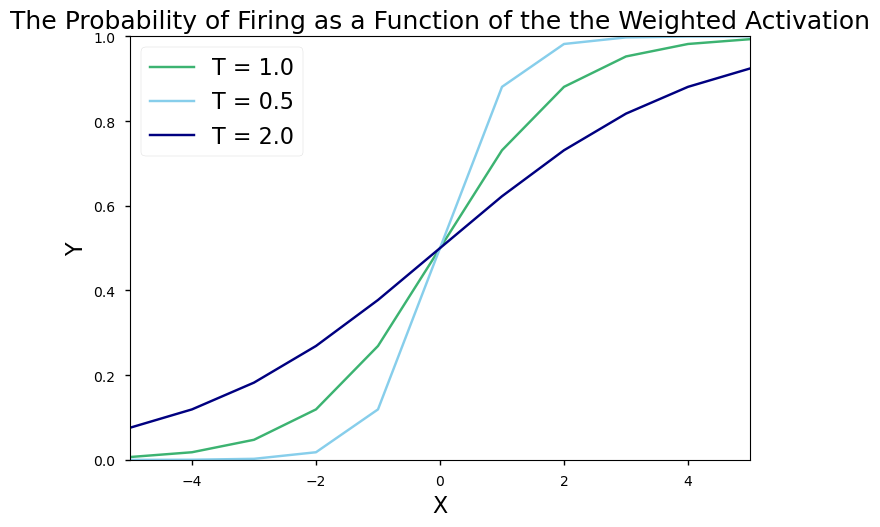

In [10]:
# Calculate firing at different T values
net_activation = np.arange(-5, 6)
p_T1 = rm_activation_function(net_activation, theta = 0.0, T = 1.0)
p_T05 = rm_activation_function(net_activation, theta = 0.0, T = 0.5)
p_T2 = rm_activation_function(net_activation, theta = 0.0, T = 2.0)

# Plot the probability of firing at different T values
plt.plot(net_activation, p_T1, label = "T = 1.0", c = "mediumseagreen")
plt.plot(net_activation, p_T05, label = "T = 0.5", c = "skyblue")
plt.plot(net_activation, p_T2, label = "T = 2.0", c = "navy")

# Set x and y limits
plt.xlim(-5, 5)
plt.ylim(0, 1)

# Label axes, title, and legend
plt.title("The Probability of Firing as a Function of the the Weighted Activation", fontsize = 18)
plt.xlabel("X", fontsize = 16)
plt.ylabel("Y", fontsize = 16)
plt.legend(prop = {"size": 16})

<div class="alert alert-info" role="alert">
<h1>Exercise 2c)</h1>
<p>
Discuss how this activation function differs from the standard perceptron activation function. (max 5 sentences)

(Points 2)
</p>
</div>



This activation function differs from the standard perceptron activation function because it utilizes T to modify the function, with T = 1 being the typical activation function. Lower values of T will make the activation function hyper sensitive to changes around the threshold. Higher values of T will have the opposite effect i.e. making the activation function more gradual and linear. T allows for unique tuning over how binary decisions are made based on the input signal. This is useful for stimulating the probabilty of firing for various differnt types of physical systems. 

# U Shaped Curves

Recall from lecture that RM used this model to demonstrate a developmental U-shape curve.

First they trained the model on ten high frequency words (8 irregular, 2 regular), then medium frequency verbs, then low frequency verbs. They then plotted the percent of wickelfeatures the model correctly predicted for irregular and regular verbs as the model saw more data. 

Let's replicate this step by step :)

First, let's load in a corpus of English verbs.

In [11]:
# read in the corpus

verbs = []
with open('verbs.csv') as f:
    for i, line in enumerate(f.readlines()):
        if i == 0:
            print(line.strip('\n').split(','))
        else:
            verbs.append(line.strip('\n').split(','))
            print(verbs[-1])

# add in the high frequency verbs you translated for us earlier
for i, word in enumerate(high_frequency_verbs):
    if word in ['look', 'like']:
        verbs.append([word, 'Regular', base_high_frequency_verbs[i], past_high_frequency_verbs[i], 'H'])
    else:
        verbs.append([word, 'Irregular', base_high_frequency_verbs[i], past_high_frequency_verbs[i], 'H'])
    print(verbs[-1])


['Verb', 'Type', 'Base', 'Past', 'Frequency']
['act', 'Regular', 'akt', 'akted', 'M']
['age', 'Regular', 'Aj', 'Ajd', 'M']
['air', 'Regular', 'Ar', 'Ard', 'M']
['arise', 'Irregular', '*rIz', '*rOz', 'M']
['ask', 'Regular', 'ask', 'askt', 'M']
['back', 'Regular', 'bak', 'bakt', 'M']
['bear', 'Irregular', 'bAr', 'bor', 'M']
['beat', 'Irregular', 'bEt', 'bEt', 'M']
['become', 'Irregular', 'bEk*m', 'bEkAm', 'M']
['believe', 'Regular', 'b*lEv', 'b*lEvd', 'M']
['bend', 'Irregular', 'bend', 'bent', 'L']
['bid', 'Irregular', 'bid', 'bid', 'L']
['bleed', 'Irregular', 'blEd', 'bled', 'M']
['blow', 'Irregular', 'blO', 'blU', 'M']
['board', 'Regular', 'bord', 'borded', 'M']
['brake', 'Irregular', 'brAk', 'brOk', 'M']
['breed', 'Irregular', 'brEd', 'bred', 'L']
['bring', 'Irregular', 'briN', 'brot', 'M']
['brown', 'Regular', 'brWn', 'brWnd', 'L']
['build', 'Irregular', 'bild', 'bilt', 'M']
['buy', 'Irregular', 'bI', 'bot', 'M']
['call', 'Regular', 'kol', 'kold', 'M']
['carp', 'Regular', 'karp', 'ka

- The first column denotes the verb.
- The second column denotes whether the verb is regular or irregular.
- The third column denotes the phoneme representation of the base verb.
- The fourth column denotes the phoneme representation of the past tense verb.
- The last column denotes the verb's frequency (M: Medium or L: Low)

## First Stage: High Frequency Verbs

In the first stage, RM trained the model on the high frequency verbs.

Let's do that.

First we need to convert the phonemes into wickelfeatures.

In [12]:
base_wickel_HF = np.array([activate_word(w) for w in base_high_frequency_verbs]).T
past_wickel_HF = np.array([activate_word(w) for w in past_high_frequency_verbs]).T

Next we initialize a perceptron with our custom activation function

In [13]:
percept = Perceptron(active=rm_activation_function)

Now let's do the perceptron learning algorithm for each high frequency word (i.e. one epoch).

By default, the `Perceptron.learn()` will return the model accuracy on the data, which we measure as the percentage of the wickelfeatures the model correctly predicts.

In [14]:
percept.learn(base_wickel_HF, past_wickel_HF)

array([0.97173913, 0.94782609, 0.93695652, 0.97173913, 0.95652174,
       0.96956522, 0.95      , 0.96304348, 0.84347826, 0.93043478])

We can also score the perceptron, using `Perceptron.score()`. 

In [15]:
percept.score(base_wickel_HF, past_wickel_HF)

array([0.9673913 , 0.95434783, 0.94347826, 0.9673913 , 0.95869565,
       0.97391304, 0.9673913 , 0.96304348, 0.87173913, 0.92826087])

So after one epoch, the perceptron performs well on the verbs it has seen already. 

How will the perceptron perform on all the irregular and regular verbs, including the ones it has not seen yet?

<div class="alert alert-info" role="alert">
<h1>Exercise 3a)</h1>
<p>
    
Now let's divide the corpus `verbs` into two lists: one for regular verbs and one for irregular verbs.

(Points 2)
    
</p>
</div>

Hint: You may want to use a `for` loop over `verbs`


In [16]:
# Initialize empty lists to append verbs to
regular_verbs = [word for word in verbs if word[1] == "Regular"]
irregular_verbs = [word for word in verbs if word[1] != "Regular"]

In [17]:
assert(len(regular_verbs) == 96)
assert(len(irregular_verbs) == 96)

Now let's score the perceptron's performance on both the regular and irregular verbs.

<div class="alert alert-info" role="alert">
<h1>Exercise 3b)</h1>
<p>
First convert the phonemes for base and past tense into wickelfeatures. Then calculate the mean score of the model on irregular and regular verbs.
    
(Points 3)</p>
</div>

Hint: Look back to how we coverted phonemes into wickelfeatures above.


In [18]:
# Convert irregular and regular verbs into wickelfeatures
base_wickel_irregular = np.array([activate_word(w[2]) for w in irregular_verbs]).T
past_wickel_irregular = np.array([activate_word(w[3]) for w in irregular_verbs]).T
base_wickel_regular = np.array([activate_word(w[2]) for w in regular_verbs]).T
past_wickel_regular = np.array([activate_word(w[3]) for w in regular_verbs]).T

# Sum scores for each type of verb
irregular_score = np.mean(percept.score(base_wickel_irregular, past_wickel_irregular))
regular_score = np.mean(percept.score(base_wickel_regular, past_wickel_regular))

# Print scores
print(irregular_score)
print(regular_score)

0.9142889492753623
0.8748188405797102


In [19]:

assert(irregular_score == 0.9142889492753623)
assert(regular_score == 0.8748188405797102)

So far we've trained the model in batch, which means it has seen all the data once before we score it.

Let's train the model one data point at a time and score it after each datapoint

In [20]:
# Let's initialize a new perceptron with our custom activation function
percept = Perceptron(active=rm_activation_function)


# Now let's loop through each data point to train and score
scores_regular = []
scores_irregular = []
for i in range(len(high_frequency_verbs)):
    percept.learn(base_wickel_HF[:,i, np.newaxis], past_wickel_HF[:,i,np.newaxis])
    scores_regular.append(np.mean(percept.score(base_wickel_regular, past_wickel_regular)))
    scores_irregular.append(np.mean(percept.score(base_wickel_irregular, past_wickel_irregular)))
    print(scores_regular[-1], scores_irregular[-1])


0.6128396739130434 0.6086050724637682
0.6739583333333333 0.6753396739130434
0.7203577898550725 0.7194972826086957
0.7453577898550724 0.7426177536231884
0.7697463768115943 0.7745471014492754
0.7841485507246378 0.7931385869565216
0.7971693840579709 0.8102355072463768
0.8057291666666666 0.8263813405797102
0.8115489130434783 0.8335371376811594
0.8201766304347826 0.8421875000000001


<div class="alert alert-info" role="alert">
<h1>Exercise 3c)</h1>
<p>
Explain the model output. So far, do we replicate RM? Do we expect to get the same result if we rerun the model? (7 sentences max)
    
(Points 3)</p>
</div>

The model output shows the mean scores for irregular verbs are similar to regular verbs, but a little bit higher generally. There are a few exceptions where regular are faster to learn. Overall, this means the model is better at predicting the transition from base to past tense in irregular verbs compared to irregular. This replicates RM for the most part. Irregular verbs have unique forms that are often memorized, but this makes it easier to map/learn. The model reflects this. In terms of specific data, we do not get the exact same answers if we rerun the model, but the general results are the same. 

## Second Stage: Medium Frequency Verbs

Recall, in the second stage of the U-Shape curve, RM train the model with medium frequency verbs. Let's do it!

<div class="alert alert-info" role="alert">
<h1>Exercise 4a)</h1>
<p>
    
First, we need to extract the medium frequency verbs from the corpus `verbs`.
    
(Points 1)
    
</p>
</div>


In [21]:
# Store the medium frequency verbs here
base_med_frequency_verbs = [word[2] for word in verbs if word[4] == "M"]
past_med_frequency_verbs = [word[3] for word in verbs if word[4] == "M"]

In [22]:
assert(len(base_med_frequency_verbs) == 150)
assert(len(past_med_frequency_verbs) == 150)

<div class="alert alert-info" role="alert">
<h1>Exercise 4b)</h1>
<p>
Second, we need to convert those those verbs into wickelfeatures.
    
(Points 2)</p>
</div>


In [23]:
# Convert the verbs into wickelfeatures
base_wickel_MF = np.array([activate_word(w) for w in base_med_frequency_verbs]).T
past_wickel_MF = np.array([activate_word(w) for w in past_med_frequency_verbs]).T

Now, we need to loop through each data point to train and score, like we just did for the high frequency verbs.

<div class="alert alert-info" role="alert">
<h1>Exercise 4c)</h1>
<p>
    
Calculate and store the scores for regular and irregular verbs in the variables `scores_irregular_md` and `scores_regular_md`.
    
(Points 2)
    
</p>
</div>


In [24]:
# Loop through the medium frequency verbs to train and score the model here
scores_regular_md = []
scores_irregular_md = []

for i in range(len(base_med_frequency_verbs)):
    percept.learn(base_wickel_MF[:,i, np.newaxis], past_wickel_MF[:,i,np.newaxis])
    scores_regular_md.append(np.mean(percept.score(base_wickel_regular, past_wickel_regular)))
    scores_irregular_md.append(np.mean(percept.score(base_wickel_irregular, past_wickel_irregular)))
print(scores_regular_md[-1], scores_irregular_md[-1])

0.9333333333333332 0.9447690217391305


In [25]:
assert(scores_regular_md[-1] == 0.9333333333333332 )
assert(scores_irregular_md[-1] == 0.9447690217391305)

## Third Stage: Low Frequency Verbs

In the third stage of the U-Shape curve, RM train the model with low frequency verbs. One last time then :)

<div class="alert alert-info" role="alert">
<h1>Exercise 4d)</h1>
<p>
    
First, we need to extract the low frequency verbs from the corpus `verbs`.
    
(Points 1)
    
</p>
</div>

In [26]:
# Store the low frequency verbs here
base_low_frequency_verbs = [word[2] for word in verbs if word[4] == "L"]
past_low_frequency_verbs = [word[3] for word in verbs if word[4] == "L"]

In [27]:
assert(len(base_low_frequency_verbs) == 32)
assert(len(past_low_frequency_verbs) == 32)

<div class="alert alert-info" role="alert">
<h1>Exercise 4e)</h1>
<p>
Second, we need to convert those those verbs into wickelfeatures.
    
(Points 2)</p>
</div>


In [28]:
# Convert the verbs into wickelfeatures
base_wickel_LF = np.array([activate_word(w) for w in base_low_frequency_verbs]).T
past_wickel_LF = np.array([activate_word(w) for w in past_low_frequency_verbs]).T

Finally, we need to loop through each data point to train and score.

<div class="alert alert-info" role="alert">
<h1>Exercise 4f)</h1>
<p>
    
Calculate and store the scores for regular and irregular verbs in the variables `scores_irregular_low` and `scores_regular_low`.
    
(Points 2)
</p>
</div>


In [29]:
# Loop through the medium frequency verbs to train and score the model here

scores_regular_low = []
scores_irregular_low = []

for i in range(len(base_low_frequency_verbs)):
    percept.learn(base_wickel_LF[:,i, np.newaxis], past_wickel_LF[:,i,np.newaxis])
    scores_regular_low.append(np.mean(percept.score(base_wickel_regular, past_wickel_regular)))
    scores_irregular_low.append(np.mean(percept.score(base_wickel_irregular, past_wickel_irregular)))
print(scores_regular_low[-1], scores_irregular_low[-1])

0.9432065217391304 0.9518795289855072


In [30]:
assert(scores_regular_low[0] == 0.9320652173913043)
assert(scores_irregular_low[0] == 0.9478940217391304)
assert(scores_regular_low[-1] == 0.9432065217391304)
assert(scores_irregular_low[-1] == 0.9518795289855072)

## Putting it all together

<div class="alert alert-info" role="alert">
<h1>Exercise 5a)</h1>
<p>
Let's see how well we replicated the U-Shape pattern by plotting the simulation output.
    
(Points 5)</p>
</div>

For full credit your code should:

- Plot the percent of correct wickelfeatures (Y-axis) as a function of the amount of datapoints trained on for both regular and irregular verbs (use distinct colors please).
- Plot dashed vertical lines at 10 and 160 data points to demarcate the three different time periods.
- Set labels for both axes.
- Set a title for the figure.
- Set the plot to span (0.5, 1) for the y-axis and and (0, 192) for the x-axis
- Set a legend indicating how colors map to verb type

Hint: to concatenate two lists into a bigger list you can use the following syntax:
`big_list = one_list + another_list`


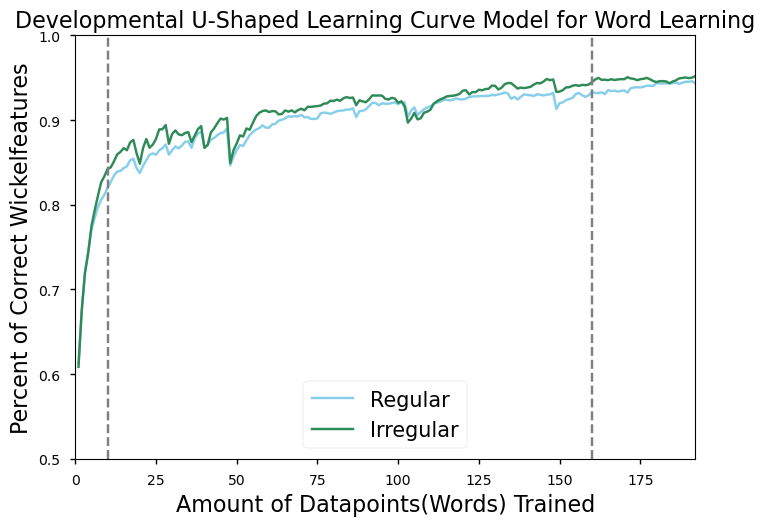

In [31]:
# Define x-axis as amount of datapoints trained
total_list = regular_verbs + irregular_verbs
total_points = list(range(1, 1 + len(total_list)))

# Concenate regular/irregular scores to be able to plot on y-axis
combined_scores_reg = scores_regular + scores_regular_md + scores_regular_low
combined_scores_irr = scores_irregular + scores_irregular_md + scores_irregular_low

# Plot both on same graph, with set x/y lim
plt.plot(total_points, combined_scores_reg, label = "Regular", color = "skyblue")
plt.plot(total_points, combined_scores_irr, label = "Irregular", color = "seagreen")
plt.xlim(0, 192)
plt.ylim(0.5, 1)

# Label axes, title, and legend
plt.title("Developmental U-Shaped Learning Curve Model for Word Learning", fontsize = 16)
plt.xlabel("Amount of Datapoints(Words) Trained", fontsize = 16)
plt.ylabel("Percent of Correct Wickelfeatures", fontsize = 16)
plt.legend(prop = {"size": 15})

# Two different time period lines
plt.axvline(x = 10, linestyle = "--", color = "grey")
plt.axvline(x = 160, linestyle = "--", color = "grey")

<div class="alert alert-info" role="alert">
<h1>Exercise 5b)</h1>
<p>

1) Did we replicate RM's U-shaped curve? Why or why not? Be specific.

2) Do you believe this model is a fair model of children's acquisition? Why or why not? Be specific.
    
(Points 7)</p>
</div>

For each question make no more than three specific arguments. We will only mark the first three. Feel free to bullet your points. This is not an essay.

1) We did not replicate RM's U-shaped curve very well.
    a) In RM's learning curve, regular verbs generally had a higher percentage of features correct throughout. This is not the case in our model as irregular verbs are consistently slightly abover regular verbs.
    b) There is no large downward spike in only irregular verbs. The model is supposed to have this spike early on and with irregular only. This is not the case in our model, with the only downward spike being minor, later on, and with both irregular/regular. The point of the spike is to highlight the difference between word learning of regular/irregular and is an important feature of RM's model. 
    c) However, the general shape of word learning does replicate. Both model's have the same common trajectory. 
2) I do not believe this model is a fair model of children's acquisition.
    a) The model assumes that we first use irregular verbs then regular. This is not the case in the real world. Building a model around a fallacy thus doesn't represent accquistion correctly.
    b) Another issue with the model's assumptions is that there is a vocabulary growth spurt. The timing of the growth spurt doesn't work with the timing of the past tense accquistion leading to it being a less accurate model.
    c) The model is generally over simplified. Children are very complex. The model only produces past tense forms, but can't recognize past-tense. Further, modeling words in a single block of Wickelfeatures ignores distinct aspects of phonology. 

# Impress Me

If you have recieved full marks on everything up to here in the assignment, you would have an A (74). If you struggled to make it this far into the assignment, you might consider skipping these next two questions and focusing on the previous questions. These next two questions are less structured and will be marked harder. To reiterate, you can get an A without even attempting these questions.

## Error Analysis

<div class="alert alert-info" role="alert">
<h1>Exercise 6)</h1>
<p>
In this exercise, you need to conduct a more thorough error analysis of RM's model.
On page 22 of the RM source paper, they describe eight different classes of irregular verb.
The goal of this question is to create a similar graph to the one you just made but with individual lines for every type of irregular verb.
    
(Points 13)</p>
</div>

In order to recieve full marks you must,
- Annotate the types of irregular verbs (important: this must be done within this notebook file).
- Run a new instance of the RM perceptron following the same training regime.
- Score the model on each type of irregular verb.
- Plot the learning trajectory for each type of irregular verb.
- Discuss your findings, which means STATE the model output, STATE why the model does it, STATE whether or not you believe it, and STATE why you do/don't believe it (500 words max).

Above all else clarity is imperative. Comment all your code so that we can understand what you are doing. Make sure all your plots are legible. Just as in the real world, if it's brilliant but nobody can understand it, it won't get you anywhere.


In [32]:
# All verbs annotations describe how the verb changes to form the past tense

# Do no change at all
type_irr_I = ['beat', 'fit', 'set', 'spread', 'hit', 'cut', 'put', 'thrust', 'bid']

# Change a final /d/ to /t/
type_irr_II = ['build', 'send', 'spend', 'bend', 'lend']

# Undergo an internal vowel change and also add a final /t/ or /d/
type_irr_III = ['feel', 'deal', 'do', 'tell', 'sell', 'hear', 'keep', 'leave', 'sleep', 'lose', 'mean', 'say', 'sweep', 'creep', 'weep']

# Internal vowel change, delete a final consonant, and add a final /t/ or /d/
type_irr_IV = ['have', 'make', 'think', 'buy', 'bring', 'seek', 'teach', 'catch']

# Internal vowel change whose stems end in a dental
type_irr_V = ['get', 'meet', 'shoot', 'write', 'lead', 'understand', 'sit', 'mislead', 'bleed', 'feed', 'stand', 'light', 'find', 'fight', 'read', 'meet', 'hide', 'hold', 'ride', 'breed', 'wind', 'grind']

# Undergo vowel change of /i/ to /a/ or internal vowel change of /i/ or /a/ to / /
type_irr_VI = ['drink', 'ring', 'sing', 'swim', 'drag', 'hang', 'swing', 'dig', 'cling', 'stick']

# Undergo a vowel change and that end in a dipthongal sequence
type_irr_VII = ['give', 'take', 'come', 'shake', 'arise', 'rise', 'run', 'become', 'bear', 'wear', 'speak', 'break', 'drive', 'strike', 'fall', 'freeze', 'choose', 'tear']

# All other verbs that undergo an internal vowel change
type_irr_VIII = ['go', 'throw', 'blow', 'grow', 'draw', 'fly', 'know', 'see']

# List of different types of verbs, easier to loop through for conversion to base/past and to wickel
type_irr_list = [type_irr_I, type_irr_II, type_irr_III, type_irr_IV, type_irr_V, type_irr_VI, type_irr_VII, type_irr_VIII]

# For each type of verb, loop through verbs, and append corresponding base/past list
base_type_list = [[word[2] for word in verbs for w in type_irr_list[idx] if word[0] == w] for idx in range(len(type_irr_list))]
past_type_list = [[word[3] for word in verbs for w in type_irr_list[idx] if word[0] == w ] for idx in range(len(type_irr_list))]

# Convert the verbs into wickelfeatures by looping through each word in each type list
base_wickel_type_list = [np.array([activate_word(w) for w in base_type_list[idx]]).T for idx in range(len(type_irr_list))]
past_wickel_type_list = [np.array([activate_word(w) for w in base_type_list[idx]]).T for idx in range(len(type_irr_list))]

# Keep track of each type of verb's set of scores
scores_irr_list = [[] for i in range(len(type_irr_list))]

# Loop through each type of verb, type base/past, and each verb within those lists to score and track within lists inside of scores_irr_list
for num_irr in range(len(type_irr_list)):
    # Initialize a new perceptron with our custom activation function for each verb type
    percept = Perceptron(active = rm_activation_function)
    for i in range(len(base_wickel_type_list[num_irr][0])):
        percept.learn(base_wickel_type_list[num_irr][:, i, np.newaxis], past_wickel_type_list[num_irr][:, i, np.newaxis])
        scores_irr_list[num_irr].append(np.mean(percept.score(base_wickel_type_list[num_irr], past_wickel_type_list[num_irr])))

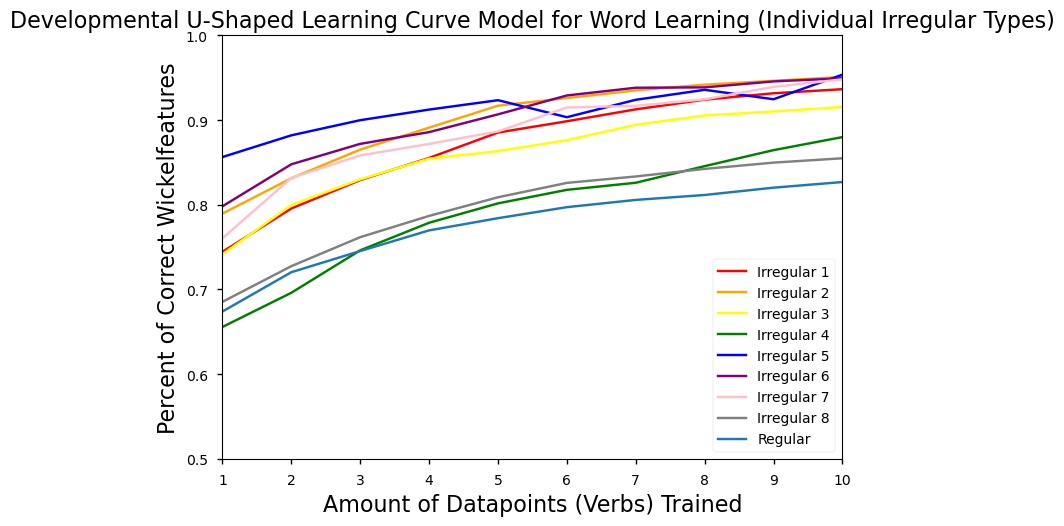

In [33]:
# Define colors for irregular verbs
irregular_colors = ["red", "orange", "yellow", "green", "blue", "purple", "pink", "grey"]

# Plot both regular and 7 types of irregular on same graph using interploation to size 20 (largest size of irr verb type list)
average_list_len = int(np.average([len(type_irregular) for type_irregular in type_irr_list]))
x_data_points = [*range(average_list_len)]

# Interpolate to average length of word lists to be able to compare on same graph i.e. same x-axis and plot. 
for i in range(len(type_irr_list)):
    interpolated_data_irr = np.interp(np.linspace(0, len(scores_irr_list[i]) - 1, average_list_len), range(len(scores_irr_list[i])), scores_irr_list[i])
    plt.plot(x_data_points, interpolated_data_irr, label = f"Irregular {i + 1}", color = irregular_colors[i])

# It would not make sense to interpolate 192 points of data to average length of the word lists that we trained on.
# This would skew the data weirdly. Thus, range from 1 to average length of word list is taken so that we can plot this on the same graph as the irregulars.
data_reg = [combined_scores_reg[point] for point in range(average_list_len)]
plt.plot(x_data_points, data_reg, label = "Regular")

# Set x and y limits
plt.xlim(1, average_list_len - 1)
plt.ylim(0.5, 1)

# Label axes, title, and legend
plt.title("Developmental U-Shaped Learning Curve Model for Word Learning (Individual Irregular Types)", fontsize=16)
plt.xlabel("Amount of Datapoints (Verbs) Trained", fontsize = 16)
plt.ylabel("Percent of Correct Wickelfeatures", fontsize = 16)
plt.legend(prop = {"size": 10}, loc = "lower right")

# Show the plot
plt.show()

The model outputs shows that for all irregular verb types the model trains faster i.e. learns faster on irregular types compared to regular. The model learns irregular 1 learns the slowest and irregular 2, 5, and 6 the fastest. In general, all types increased percent correct as amount of datapoints increased. The model output this for a variety of factors. Generally speaking, irregular verbs are learned faster because children/the model often memorize them, so there is less error. This replicates RM for the most part. Within the types 2, 5, and 6 are the fastest to learn likely because they are all internal vowel changes with distinct rules i.e. internal vowel change whose stems end in a dental, undergo vowel change of /i/ to /a/ or internal vowel change of /i/ or /a/ to / /,  , or a simple one dimensional rule change i.e. change a final /d/ to /t/, These rules enable fast learning because they are very niche along with vowels generally being rarer than constants. Rarity enable faster learning because the edge cases arise faster. However, I do believe there should be more of a learning curve. I think overall it starts to high (see irregular types 5 and 6) and is not realistic for children. In any case, they aren't getting verbs mostly correct on the first try. On the end of the spectrum, irregular 8 learns the slowest because it does not have a niche class of rules. It is defined as all other verbs that undergo an internal vowel change i.e. more or less an outliers category. Computers are based on rules, logical expressions, and a lack of ambiguity. Therfore, this type is hardest to learn. Thus, I do believe that irregular type 8 is the hardest to learn. However, I do have qualms about trusting the model completely because of two main reasons. The model trained on an average of 10 words for each type. I do not consider 10 words a large enough quantity to make accurate predictions. Secondly, the different amounts of each type of verb forced manipulation of the data for graphing and interpreting. The interpolation scaling method for irregulars and range method i.e. 'snapshot', can stretch, shrink, or portray the data in various ways. This may lead to misrepresentation, despite it being necessary. I would increase the amount of data trained on and ensure equal quantities of each type as a future improvement. 

## Experimental Predictions

<div class="alert alert-info" role="alert">
<h1>Exercise 7)</h1>
<p>
    
In addition to matching developmental patterns, connectionist models of the past tense can be used to make predictions for behavioral experiments. For example, we could present participants with novel verbs (e.g., *sweek*) and ask them to provide the past tense for those verbs to see if they follow the rules of generalize based on similarity. Before we conduct the experiment though, we can use RM's model to make predictions about how people should generate past tense forms. The goal of this exercise is to generate predictions for such an experiment.
    
(Points 13)

</p>
</div>


- Construct a set of 20 novel verbs along with their regular past tense and a plausible irregular past tense form (e.g., *sweek*, *sweeked*, *swoke*)
- Use a trained RM perceptron model to score both irregular/regular past tense forms
- Plot the model predictions
- Discuss the predictions, which means for each verb STATE which past tense form is most predicted by the model, STATE if you find the model's prediction surprising and STATE why you think the model made that prediction (250 words max).
- Based on the model predictions, discuss if this is a good experiment for testing whether rules or similarity underly the generation of past tense forms (250 words max).

Above all else clarity is imperative. Comment all your code so that we can understand what you are doing. Make sure all your plots are legible. Just as in the real world, if it's brilliant but nobody can understand it, it won't get you anywhere.


In [34]:
# 20 verbs with base and regular/irregular past tenses
novel_verbs = [['sweek,', 'sweeked', 'swoke'], ['slarf', 'slarfed', 'slarve'], ['tront', 'tronted', 'trent'], ['blave', 'blaved', 'blove'], ['drap', 'drapped', 'drop'], ['plint', 'plinted', 'plent'], ['wrask', 'wrasked', 'wrisk'], ['nurge', 'nurged', 'norg'], ['krank', 'kranked', 'krunk'], ['blimp', 'blimped', 'blamp'], ['mipe', 'miped', 'mope'], ['pringle', 'pringled', 'prang'], ['elint', 'elinted', 'elent'], ['selinge', 'selinged', 'selunge'], ['dieve', 'dieved', 'dove'], ['frove', 'frovved', 'froove'], ['shive', 'shived', 'shove'], ['frast', 'frasted', 'frest'], ['vurge', 'vurged', 'vorge'], ['quinde', 'quinded', 'quand']] 

# Convert all to phonemes
novel_base = ['SWIk', 'Slarf', 'trOnt', 'blavE', 'drap', 'plInt', 'WraSk', 'nurgE', 'krank', 'blImp', 'mIpE', 'prINlE', 'ElInt', 'SElINE', 'dievE', 'frOvE', 'SIvE', 'fraSt', 'vurgE', 'kwuIndE']
novel_past_regular = novel_past_regular = ['SWIkEd', 'SlarfEd', 'trOntEd', 'blavEd', 'drappEd', 'plIntEd', 'WraSkEd', 'nurgEd', 'krankEd', 'blImpEd', 'mIpEd', 'prINlEd', 'ElIntEd', 'SElINEd', 'dievEd', 'frOvvEd', 'SIvEd', 'fraStEd', 'vurgEd', 'kwuIndEd']
novel_past_irregular = ['SWOkE', 'SlarvE', 'trEnt', 'blOvE', 'drOp', 'plEnt', 'WrISk', 'nOrg', 'krunk', 'blamp', 'mOpE', 'praN', 'ElEnt', 'SEluNE', 'dOvE', 'frUvE', 'SOvE', 'frESt', 'vOrgE', 'kwuand']

# Convert all verbs into wickelfeatures
novel_base_wickel = np.array([activate_word(w) for w in novel_base]).T
novel_past_regular_wickel = np.array([activate_word(w) for w in novel_past_regular]).T
novel_past_irregular_wickel = np.array([activate_word(w) for w in novel_past_irregular]).T

# Initialize a new perceptron with our custom activation function for regular verbs
percept = Perceptron(active=rm_activation_function)

# Loop through each data point to train and score
novel_scores_regular = []
for i in range(len(novel_base)):
    percept.learn(novel_base_wickel[:,i, np.newaxis], novel_past_regular_wickel[:,i,np.newaxis])
    novel_scores_regular.append(np.mean(percept.score(novel_base_wickel, novel_past_regular_wickel)))
    
# Initialize a new perceptron with our custom activation function for irregular verbs
percept = Perceptron(active=rm_activation_function)

# Loop through each data point to train and score
novel_scores_irregular = []
for i in range(len(novel_base)):
    percept.learn(novel_base_wickel[:,i, np.newaxis], novel_past_irregular_wickel[:,i,np.newaxis])
    novel_scores_irregular.append(np.mean(percept.score(novel_base_wickel, novel_past_irregular_wickel)))

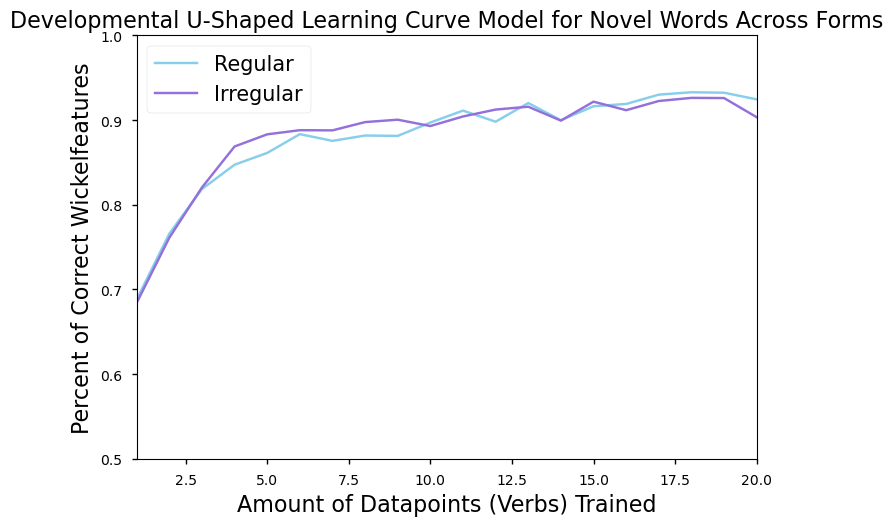

In [35]:
# Define x-axis as amount of datapoints trained
total_points = list(range(1, 1 + len(novel_base)))

# Plot both on same graph, with set x/y lim, different colors
plt.plot(total_points, novel_scores_regular, label = "Regular", color = "skyblue")
plt.plot(total_points, novel_scores_irregular, label = "Irregular", color = "mediumpurple")
plt.xlim(1, len(novel_base))
plt.ylim(0.5, 1)

# Label axes, title, and legend
plt.title("Developmental U-Shaped Learning Curve Model for Novel Words Across Forms", fontsize = 16)
plt.xlabel("Amount of Datapoints (Verbs) Trained", fontsize = 16)
plt.ylabel("Percent of Correct Wickelfeatures", fontsize = 16)
plt.legend(prop = {"size": 15})

The model outputs a U-shaped learning curve. The model trained slightly faster a little bit after the start for irregular verbs. Overall, the model learned the novel regular and irregular verbs at about the same rate. I find the model's predictions surprising. In RM's model, it learns irregular verbs faster, but also characterizes a stark dip in irregular word learning near the beginning. Neither of these facets present themselves in the novel word model. I am surprised by these predictions because they deviate from RM's model and previous models in the assignment. I think the limited input data causes the shift. Training data on only twenty words gives more power to outliers. Since I created the novel words, the novel words themselves may cause a varied result. Although the verbs appear relatively in pattern, I made them up 'out of thin air' which in itself controls the data. Lastly, even the order I introduce the verbs employs a consistent pattern. 

Based on the model predictions, the experiment relatively encompasses a poor tool for discerning whether rules or similarity underlie the generation of past tense forms.  I estimate a few varied reasons. The model did not differentiate irregular from regular to enough of an extent to make generalizations. The curves ultimately look too similar. In the real world i.e. children word learning, there is likely some distinction between irregular and regular verb learning. Overall, twenty verbs is not a high number. There are thousands of verbs that we learn. Therefore, it is not an accurate representation. Lastly, discerning whether rules or similarity underlie the generation of past tense forms is not the same as setting up an experiment for regular vs. irregular forms. We form both irregular and regular verbs under guidelines and alikeness. Thus, to use this small experiment as a marker of deciphering rules or similarity as a role in generating past tense forms would be a logical fallacy. 